In [1]:
import numpy as np
import gzip

In [2]:
def load_mnist_images(filename):
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, 28, 28)  # 将数据重新形状为28x28的图像
    return data

def load_mnist_labels(filename):
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    return data

# 加载训练集图像数据和标签
train_images = load_mnist_images('train-images-idx3-ubyte.gz')
train_labels = load_mnist_labels('train-labels-idx1-ubyte.gz')

# 加载测试集图像数据和标签
test_images = load_mnist_images('t10k-images-idx3-ubyte.gz')
test_labels = load_mnist_labels('t10k-labels-idx1-ubyte.gz')

# 打印数据集信息
print("训练集图像数量:", len(train_images))
print("训练集标签数量:", len(train_labels))
print("测试集图像数量:", len(test_images))
print("测试集标签数量:", len(test_labels))


训练集图像数量: 60000
训练集标签数量: 60000
测试集图像数量: 10000
测试集标签数量: 10000


In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
# 创建MinMaxScaler对象
scaler = MinMaxScaler()

# 将训练集图像数据转换为二维数组
train_images_flat = train_images.reshape(train_images.shape[0], -1)

# 将测试集图像数据转换为二维数组
test_images_flat = test_images.reshape(test_images.shape[0], -1)

# 对训练集图像数据进行归一化
scaled_train_images = scaler.fit_transform(train_images_flat)

# 对测试集图像数据进行归一化
scaled_test_images = scaler.transform(test_images_flat)


In [5]:
from sklearn.svm import SVC

In [6]:
# 创建SVM分类器对象并设置参数
svm_classifier1 = SVC(kernel='linear', C=1.0)

# 在训练集上训练SVM模型
svm_classifier1.fit(scaled_train_images, train_labels)

SVC(kernel='linear')

In [7]:
from sklearn.metrics import accuracy_score

In [8]:
predictions = svm_classifier1.predict(scaled_test_images)

In [10]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

In [11]:
accuracy = accuracy_score(test_labels, predictions)
recall = recall_score(test_labels, predictions, average='macro')
f1 = f1_score(test_labels, predictions, average='macro')
print("准确率:", accuracy)
print('召回率：', recall)
print('f1：', f1)

准确率: 0.9401
召回率： 0.9391170349255719
f1： 0.939206219741183


In [12]:
svm_classifier2 = SVC(kernel='poly', C=1.0, random_state=42)
svm_classifier2.fit(scaled_train_images, train_labels)

SVC(kernel='poly', random_state=42)

In [15]:
predictions2 = svm_classifier2.predict(scaled_test_images)

In [16]:
accuracy = accuracy_score(test_labels, predictions2)
recall = recall_score(test_labels, predictions2, average='macro')
f1 = f1_score(test_labels, predictions2, average='macro')
print("准确率:", accuracy)
print('召回率：', recall)
print('f1：', f1)

准确率: 0.9771
召回率： 0.9769380249358539
f1： 0.9770040605295229


In [17]:
svm_classifier3 = SVC(kernel='rbf', C=1.0)
svm_classifier3.fit(scaled_train_images, train_labels)

SVC()

In [18]:
predictions3 = svm_classifier3.predict(scaled_test_images)

In [19]:
accuracy = accuracy_score(test_labels, predictions3)
recall = recall_score(test_labels, predictions3, average='macro')
f1 = f1_score(test_labels, predictions3, average='macro')
print("准确率:", accuracy)
print('召回率：', recall)
print('f1：', f1)

准确率: 0.9791
召回率： 0.9789929743935165
f1： 0.9790243109678023


In [20]:
import matplotlib.pyplot as plt

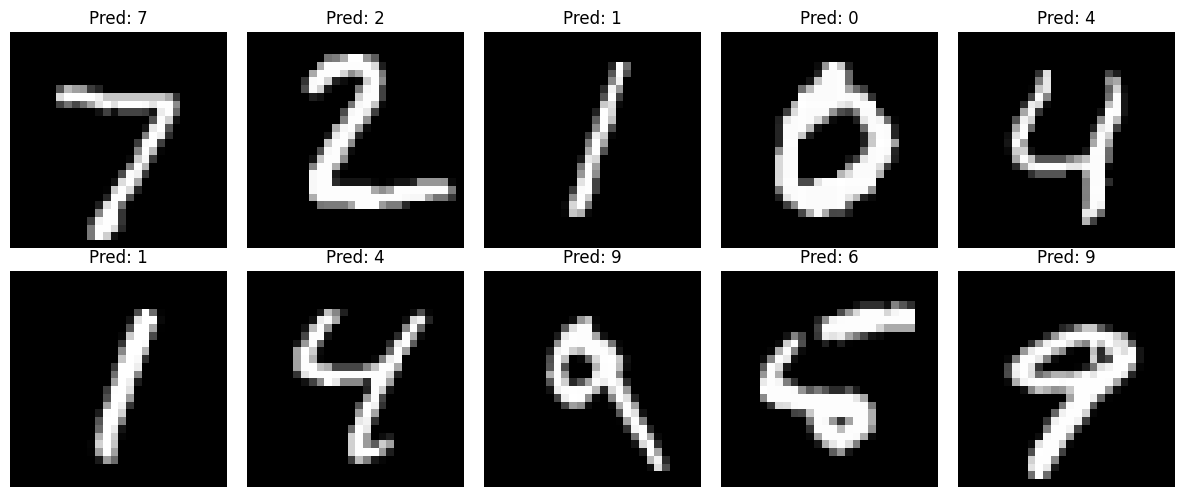

In [21]:
# 选择要显示的样本数量
num_samples = 10

# 获取前 num_samples 个样本的预测结果
sample_predictions = predictions3[:num_samples]

# 获取前 num_samples 个样本的图像和标签
sample_images = test_images[:num_samples]
sample_labels = test_labels[:num_samples]

# 创建子图，并显示样本图像及其预测结果
fig, axes = plt.subplots(2, num_samples // 2, figsize=(12, 5))

for i, ax in enumerate(axes.flatten()):
    # 显示图像
    ax.imshow(sample_images[i], cmap='gray')
    ax.axis('off')
    ax.set_title('Pred: {}'.format(sample_predictions[i]))

plt.tight_layout()
plt.show()
